In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [3]:
#reading databases
testing = pd.read_csv('Testing.csv')
training = pd.read_csv('Training.csv')


In [4]:
bs = training.loc[5]
print (training.isnull().sum())
bs.isnull().sum()     #an empty column was discovered with a name unnamed and null values


itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64


1

In [5]:
df = pd.concat([training, testing], ignore_index=True)
df = df.drop(['Unnamed: 133'], axis=1)
df.isnull().sum().sum()        #checking if there is  remaining null values



0

In [6]:
mean_values = df.groupby(['prognosis']).mean()
q = mean_values[mean_values > 0].mean().mean()  
w = mean_values[mean_values > 0].median().median()  
print(q,w)
mean_values["fluid_overload"].mean()#fluid overload was not a symptom of any disease.

0.9393911426508258 0.9504132231404959


0.0

In [8]:
df = df.drop(['fluid_overload'],axis=1)
h = mean_values.transpose()
h.replace(0, np.nan, inplace=True)
nunmber_of_Symptoms_relaated = h.count()

df


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4959,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
4960,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


In [9]:
df_values = mean_values.sum()/41*100
df_values = df_values.sort_values(ascending=0)
min_value = mean_values[mean_values > 0].min().min()
max_value = mean_values.max().max()
value_to_count = 1
#count = df_values.eq(value_to_count).sum().sum()
count_np = np.sum(df_values.values == 1.000000)
print (min_value, max_value, count_np) #minimum non zero value and maximum value 


0.00819672131147541 1.0 0


C:\Users\obadz\AppData\Local\Temp\ipykernel_22028\884404730.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


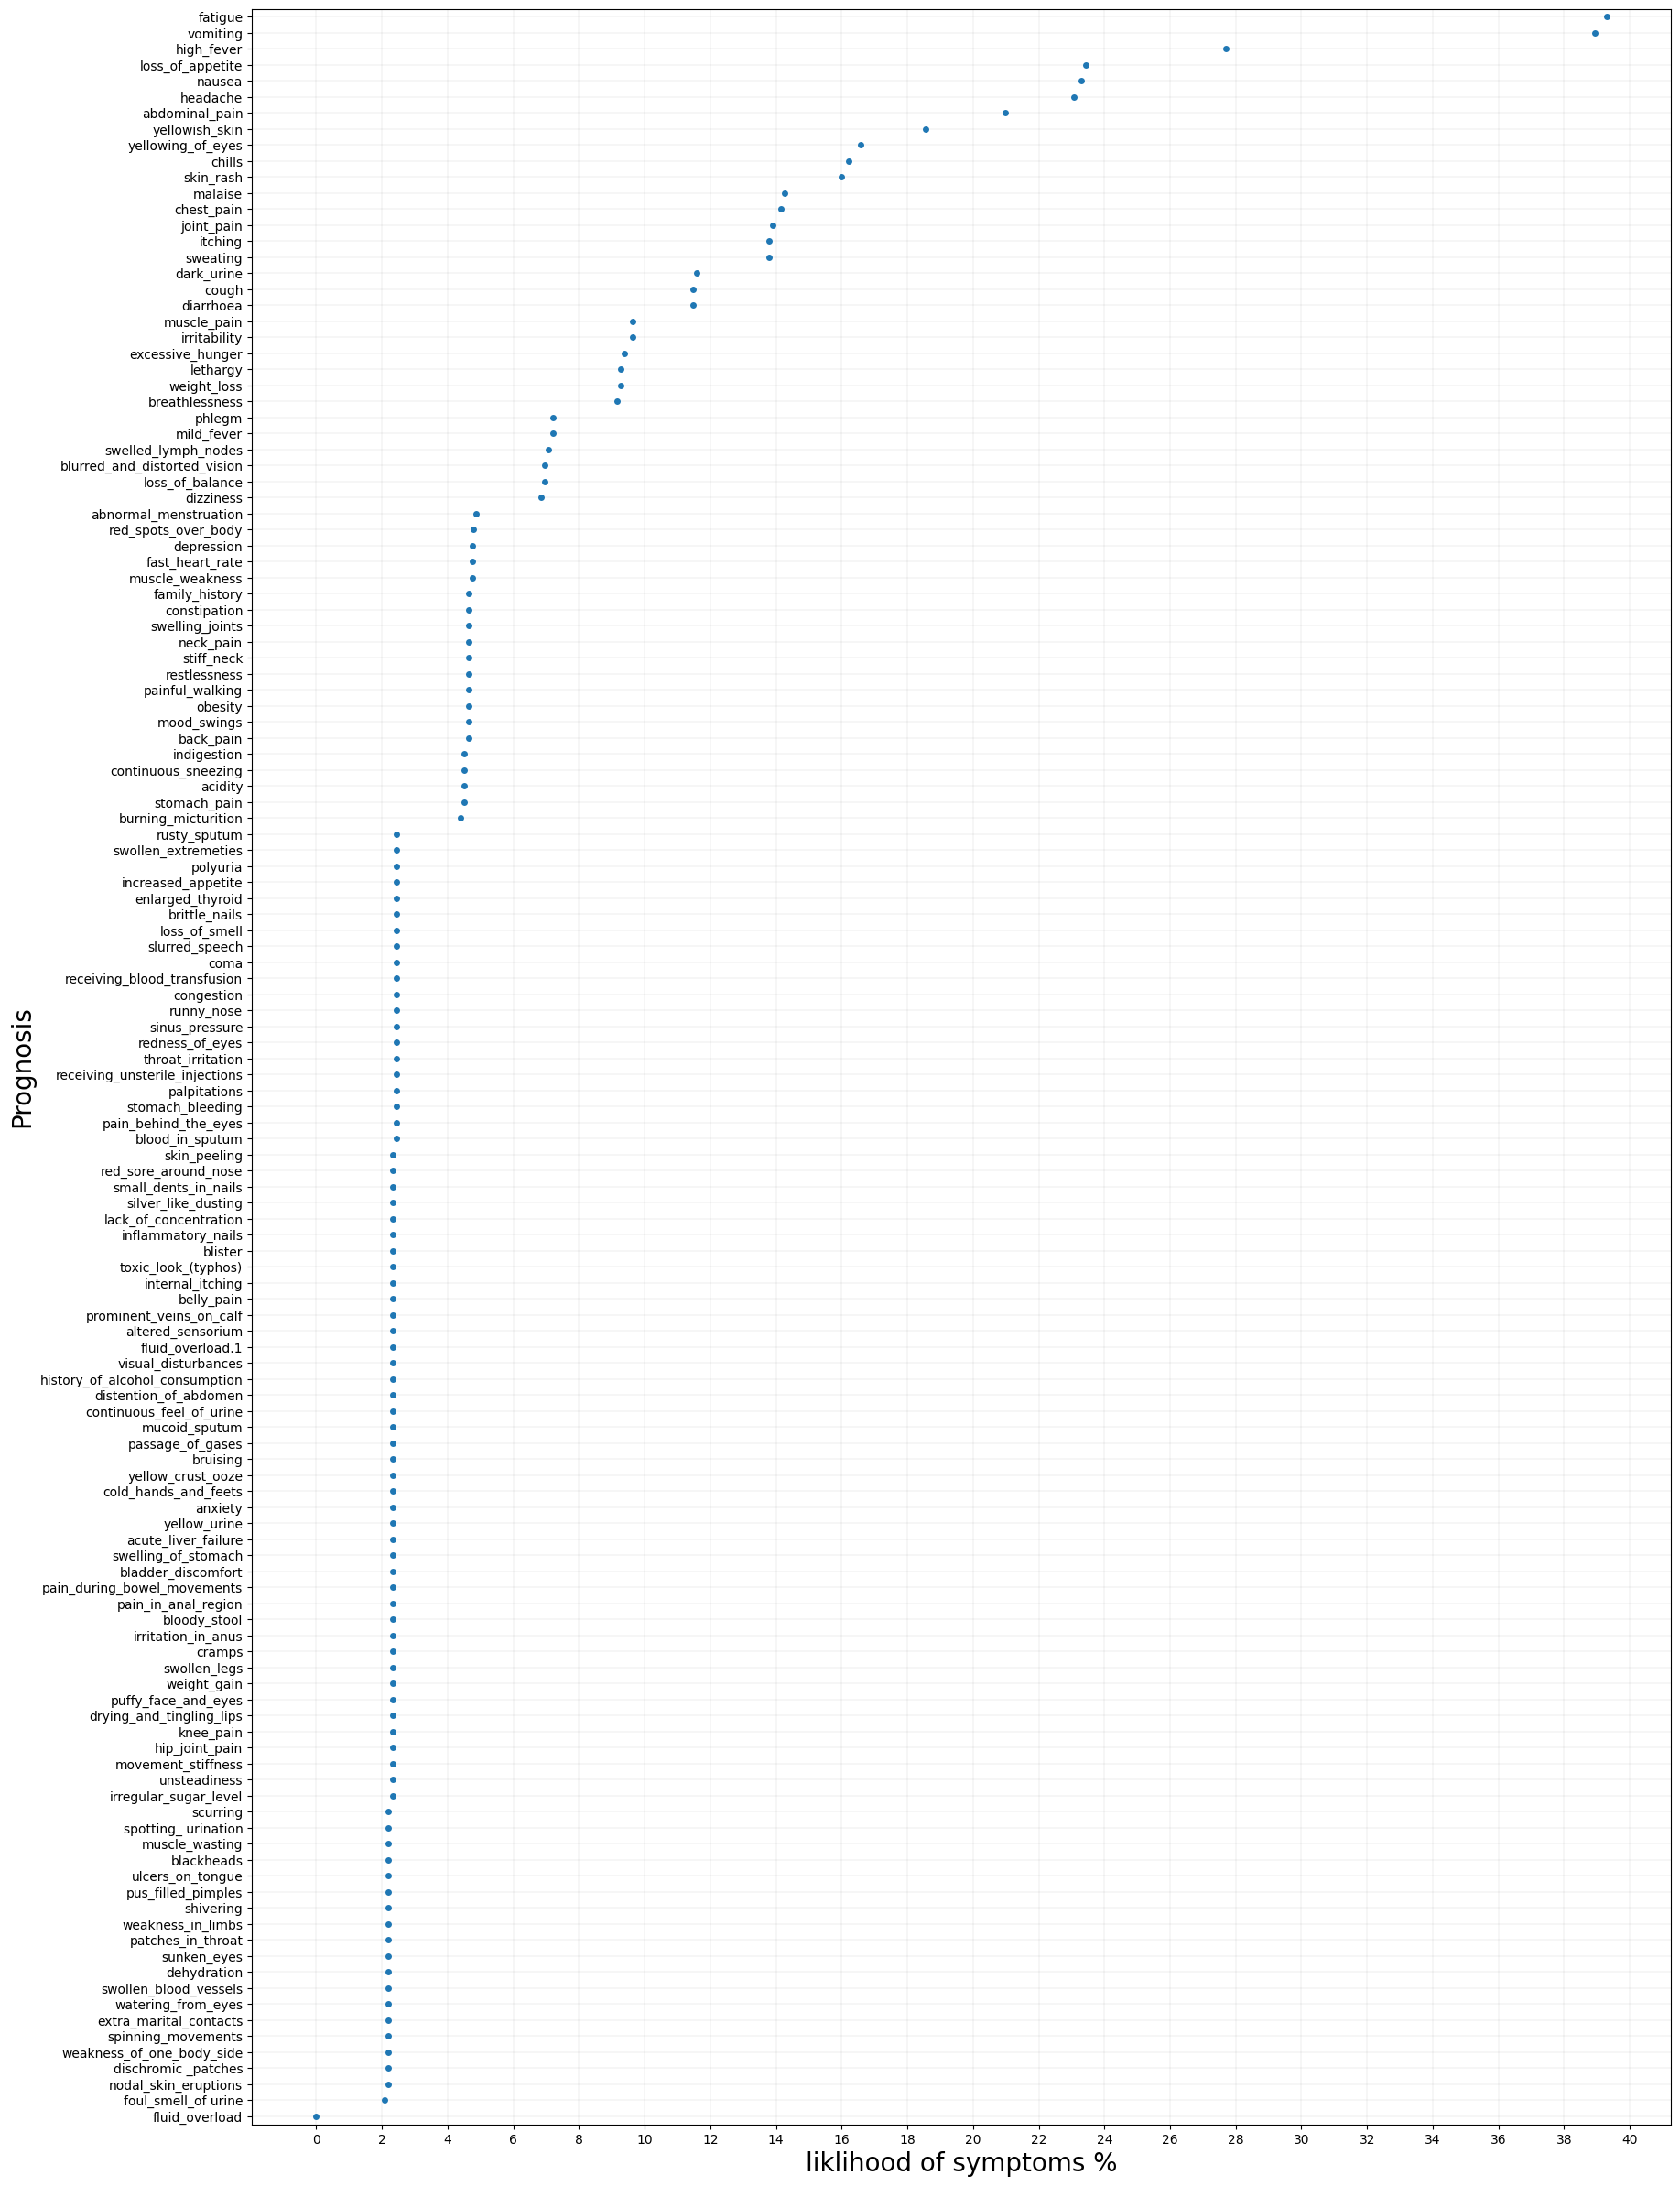

In [10]:
fig = plt.figure(figsize=(20,30))
#gs = GridSpec(1,2)
sns.swarmplot(y=df_values.index, x=df_values)
plt.ylabel('Prognosis', fontsize=20)
plt.xlabel('liklihood of symptoms %', fontsize=20)
plt.xticks(range(0, 42, 2))
plt.grid(axis='y', color='grey', linestyle='-', linewidth=0.1)
plt.grid(axis='x', color='grey', linestyle='-', linewidth=0.1)
fig.show()

C:\Users\obadz\AppData\Local\Temp\ipykernel_22028\2965119787.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


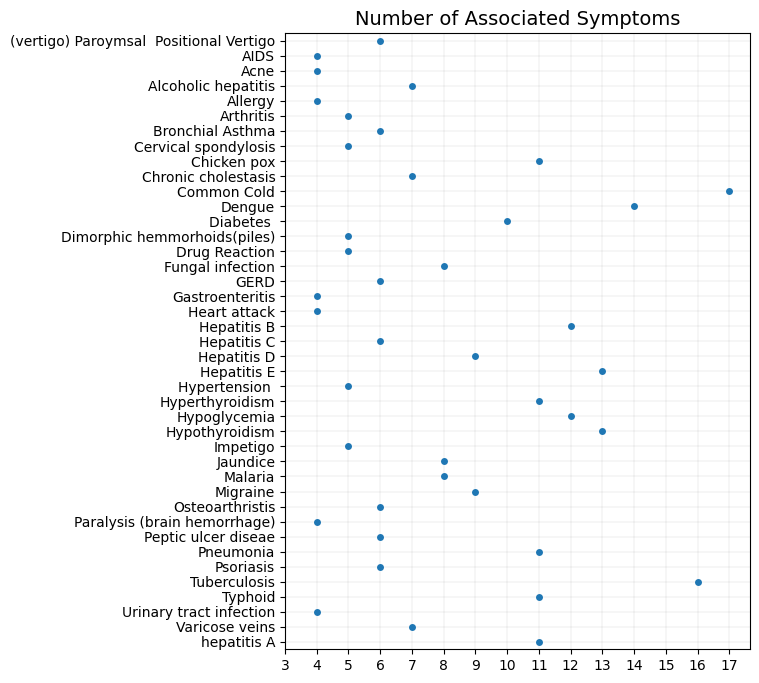

In [11]:
fig = plt.figure(figsize=(6,8))
#gs = GridSpec(1,2)
sns.swarmplot(y=nunmber_of_Symptoms_relaated.index, x=nunmber_of_Symptoms_relaated)
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.grid(axis='y', color='grey', linestyle='-', linewidth=0.1)
plt.grid(axis='x', color='grey', linestyle='-', linewidth=0.1)
plt.xticks(range(3, 18, 1))
plt.title("Number of Associated Symptoms",fontsize=14 )
fig.show()

In [ ]:
plt.figure(figsize=(150, 10))
sns.boxplot(data=mean_values)
plt.title('Box Plot of Symptoms')
plt.ylabel('Value')
plt.xlabel('Symptom')
plt.show()

In [ ]:
plt.figure(figsize=(150, 30))
for column in mean_values.columns:
    plt.scatter(mean_values.index, mean_values[column], label=column)

plt.title('Scatter Plot of Multiple Columns')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend(title='Columns')
plt.show()

In [24]:
X = df.drop(['prognosis'], axis=1)
Y = df['prognosis']
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([15, 15, 15, ..., 35, 27, 15])

In [25]:
def grid(estimator_Reg, list_parameters, X_for_training, y_for_training, n_cv = 5, scoring_type = "r2"):
    grid_DTR = GridSearchCV(estimator= estimator_Reg, param_grid= list_parameters, cv = n_cv , scoring= scoring_type)   
    grid_DTR.fit(X_for_training,y_for_training)
    print (grid_DTR.best_score_)
    print (grid_DTR.best_params_)
    return grid_DTR

In [26]:
list_para = [{"max_depth": [10], 'n_estimators': [10,20,30,40,50], 'criterion': [ 'entropy']}]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50) # perform 80-20 split on dataset

first_try = grid(RandomForestClassifier(),list_para, X_train,y_train)

0.9999927817929877
{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 30}


In [27]:
first_try.score(X_test,y_test)


0.9905384963306055